# jammer
## 15- IGRINS data of Brown Dwarfs
### Vb. Run01 `star_marley.py` on 2M0136


In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/2M0136/m104/output/marley_grid/run01/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

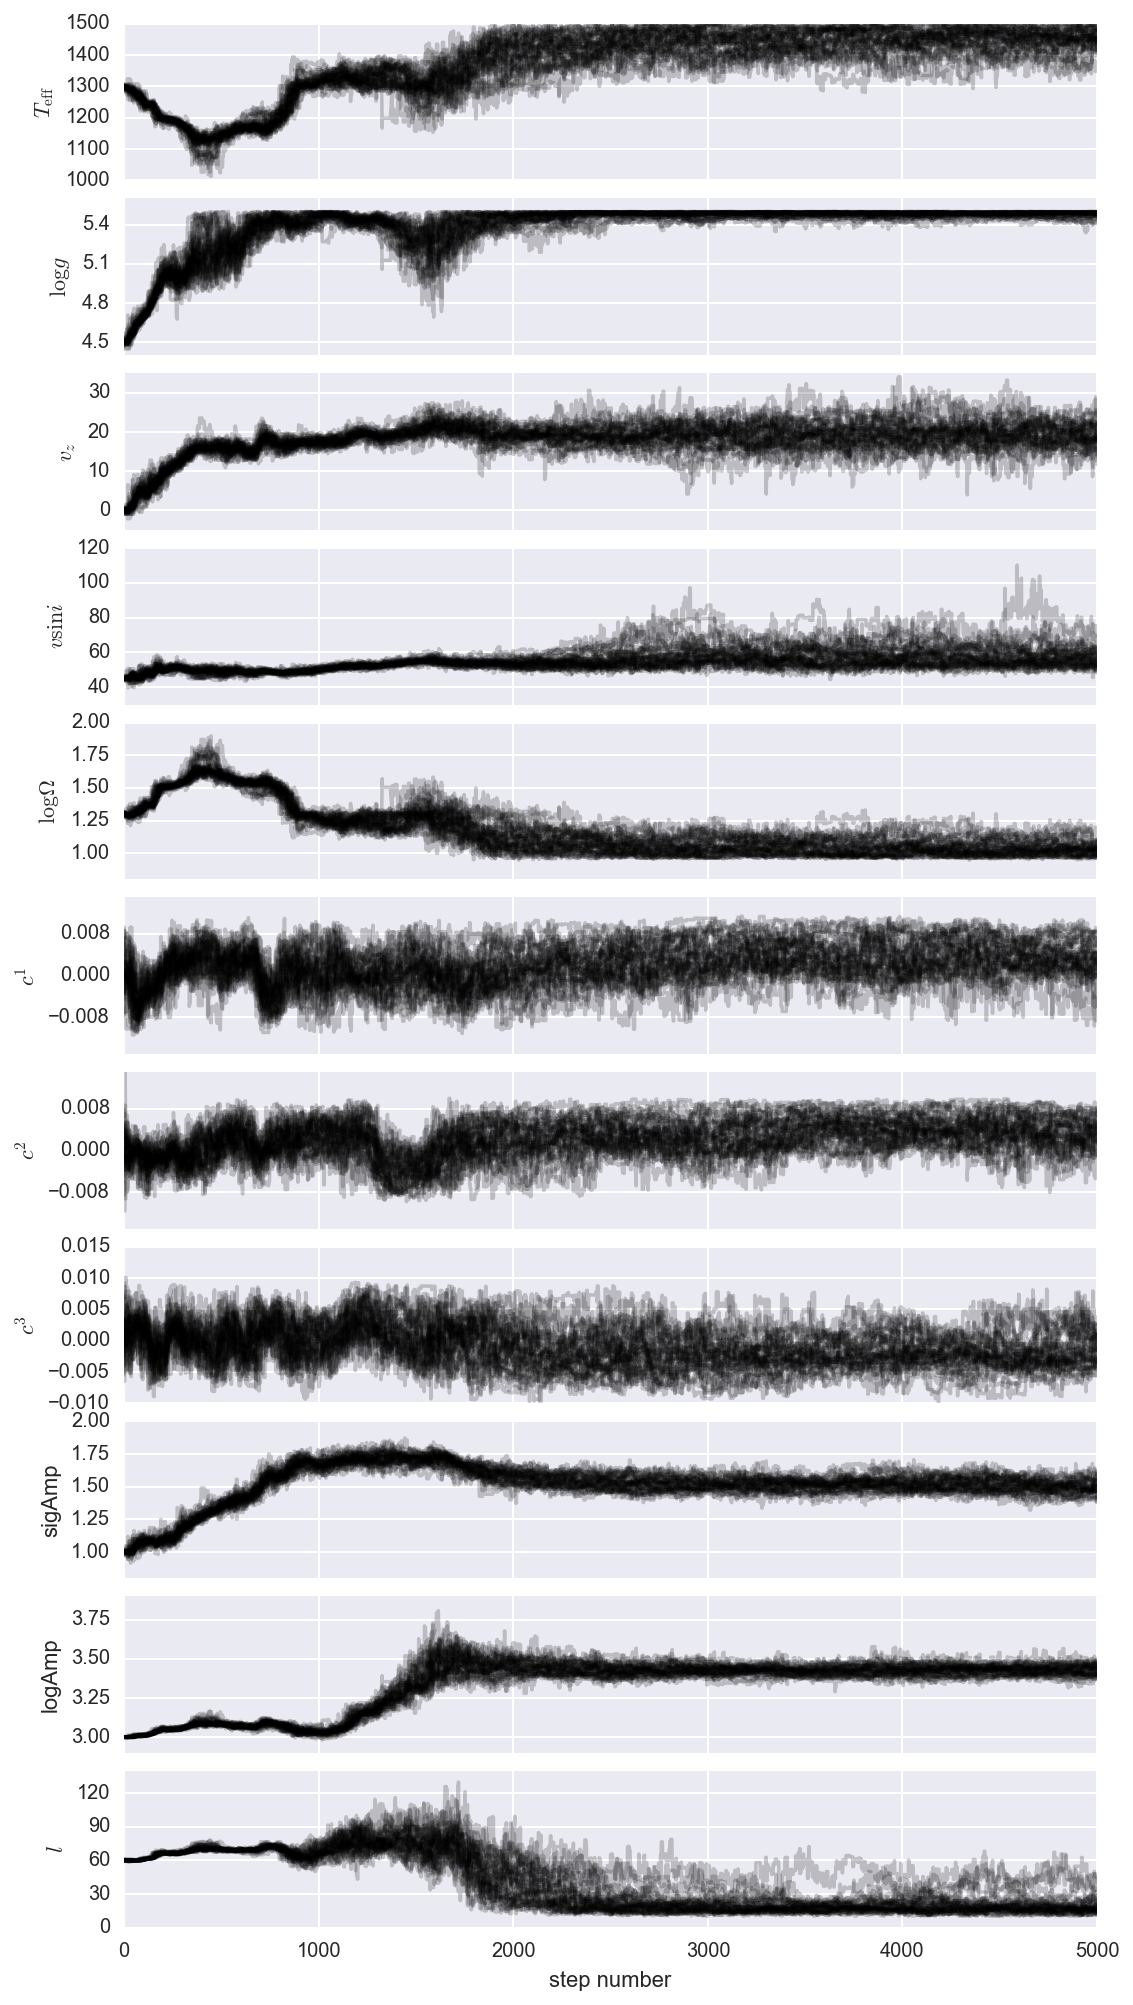

In [6]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [7]:
fc.shape

(40000, 11)

In [8]:
dat1 = pd.read_csv('../sf/2M0136/m104/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/2M0136/m104/output/marley_grid/run01/models_draw.csv')

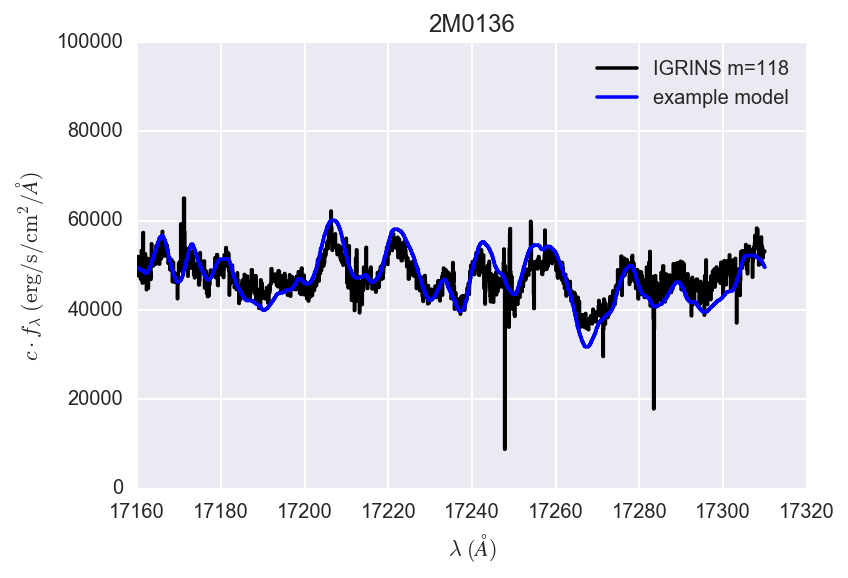

In [9]:
plt.step(dat1.wl, dat1.data, 'k', label='IGRINS m=118')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='example model')
#plt.step(dat1.wl, dat1.model_composite, 'r',label='Guess')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136')
plt.legend(loc='best')
plt.ylim(0, 100000)
plt.yscale('linear')

In [10]:
import corner

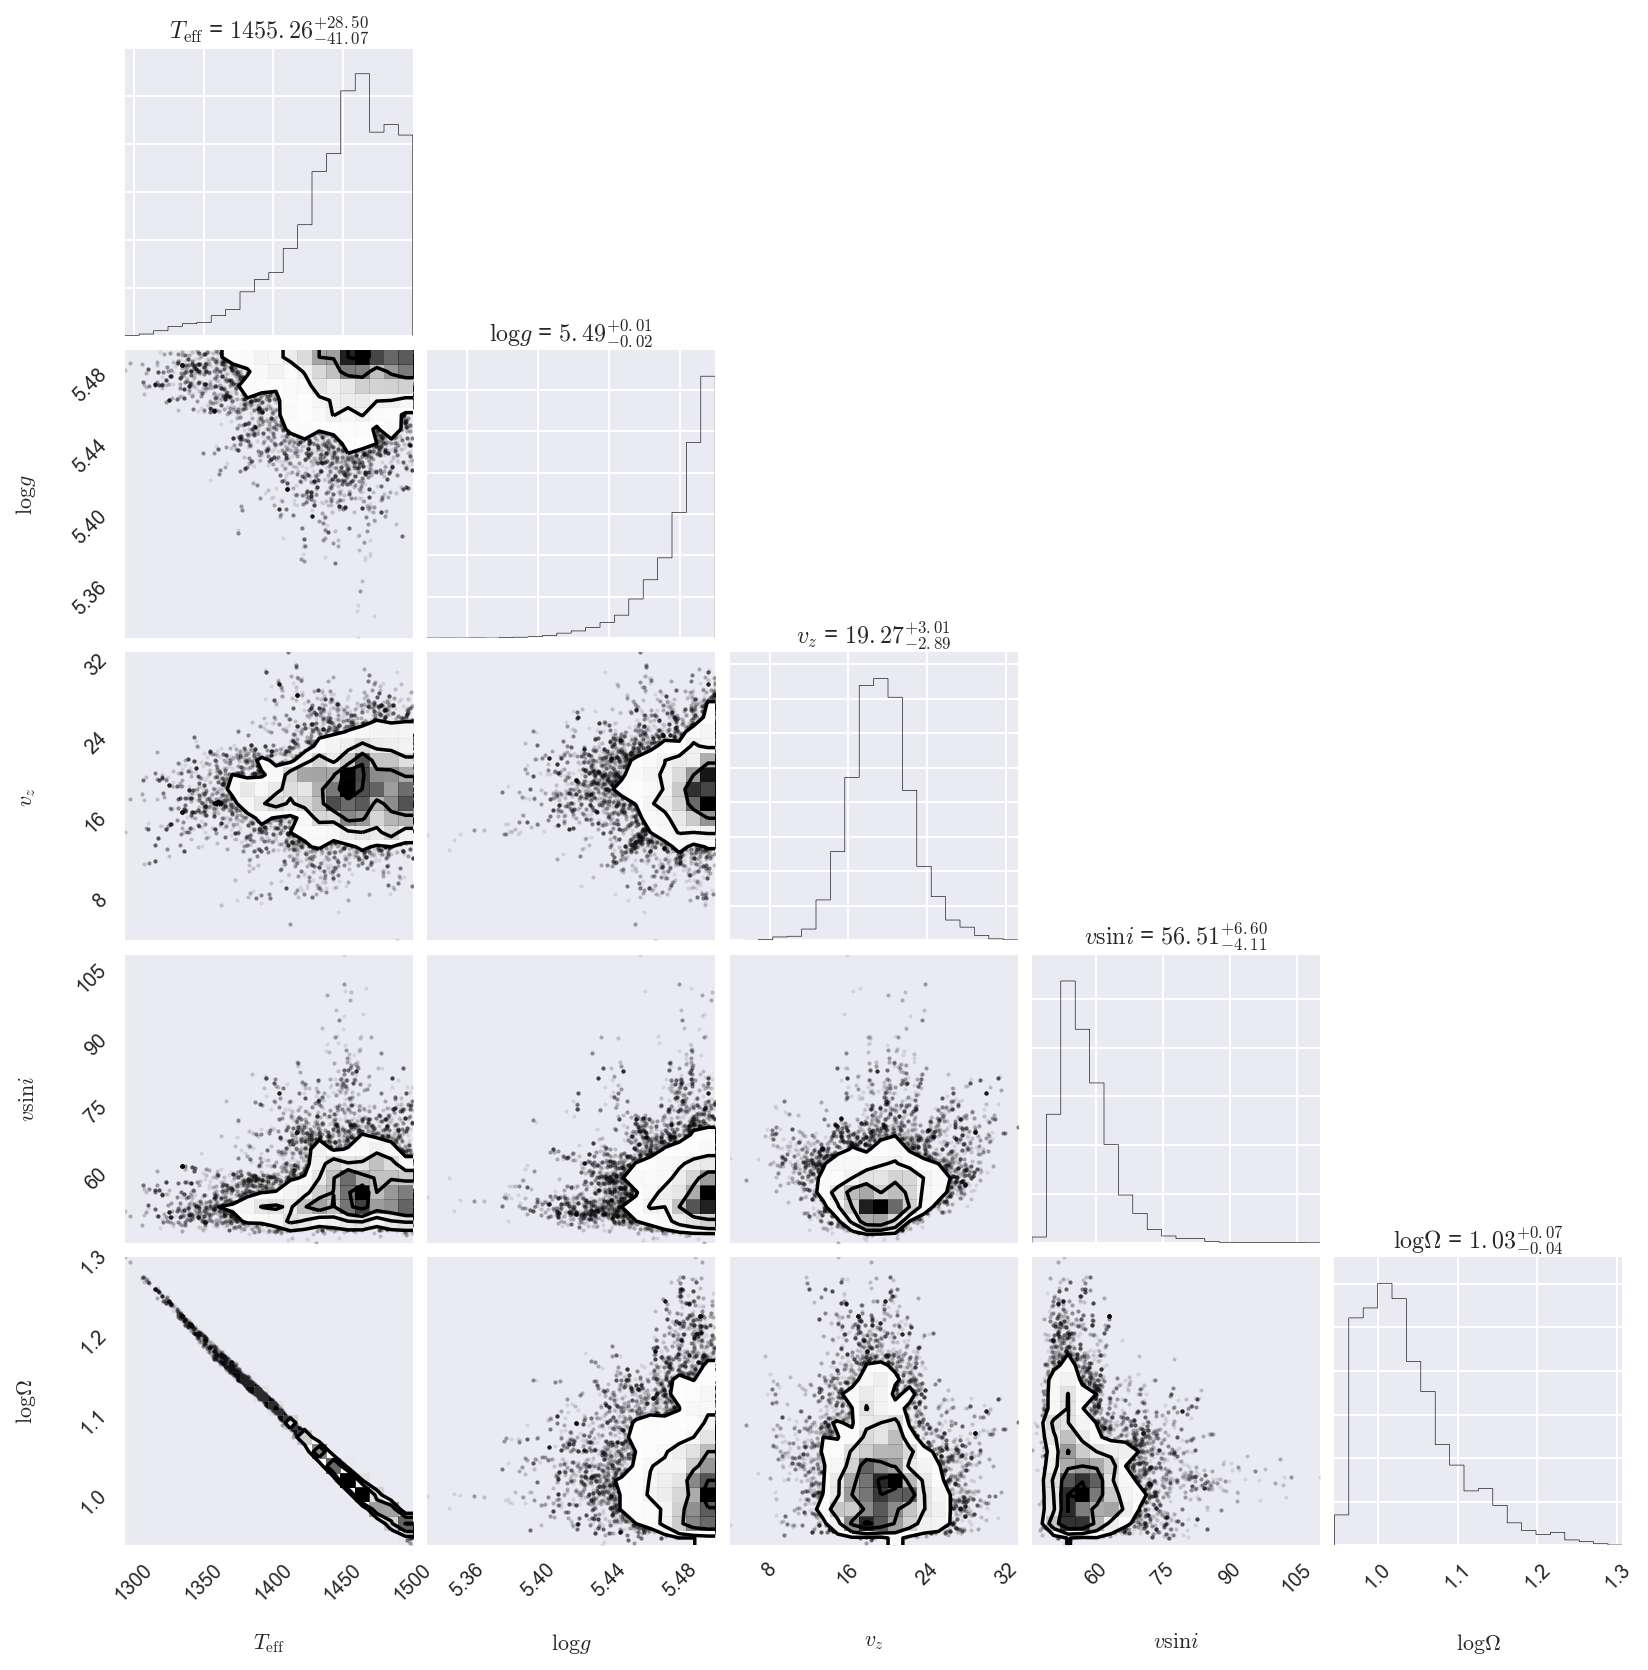

In [11]:
fig = corner.corner(fc[:, 0:5], labels=label[0:5], show_titles=True)
fig.savefig('../results/2M0136_m104_corner.png', dpi=300)

The end.